# Setup

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
PATH = r'C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\data\q4_2017.xlsx'
columns=['Sp_nummer', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Billing']
df = pd.read_excel(PATH, index_col=None, header=1)
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [2]:
df.head()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
0,Product_19,201813,13,201752,176316,NaN
1,Product_20,201813,13,201752,516510,NaN
2,Product_22,201813,13,201752,237587,NaN
3,Product_30,201813,13,201752,393741,NaN
4,Product_39,201813,13,201752,92112,NaN


In [3]:
products = df['Sp_number'].unique()
prod2idx = {}
idx2prod = {}
for idx, prod in enumerate(products):
    if prod not in prod2idx:
        prod2idx[prod] = idx
        idx2prod[idx] = prod
        
#Add column with integer product names

products_int = []
for idx, row in df['Sp_number'].iteritems():
    products_int.append(prod2idx[row])
    
df['products'] = products_int

In [4]:
mapper = {
    'products': 'product',
    'Fc_horizon': 'horizon',
    'Fc_and_order': 'forecast',
    'Billing': 'billing',
    "Due_date": "ddate",
    "Fc_date": "fdate"
}
df.rename(columns=mapper, inplace=True)

In [5]:
df['isodate'] = df[['ddate']].apply(lambda x: dt.datetime.strptime(str(x['ddate'])+'-1',"%Y%W-%w"), axis=1)

In [6]:
df.head()

,Sp_number,ddate,horizon,fdate,forecast,billing,product,isodate
0,Product_19,201813,13,201752,176316,NaN,0,2018-03-26
1,Product_20,201813,13,201752,516510,NaN,1,2018-03-26
2,Product_22,201813,13,201752,237587,NaN,2,2018-03-26
3,Product_30,201813,13,201752,393741,NaN,3,2018-03-26
4,Product_39,201813,13,201752,92112,NaN,4,2018-03-26


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27064 entries, 0 to 27063
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sp_number  27064 non-null  object        
 1   ddate      27064 non-null  int64         
 2   horizon    27064 non-null  int64         
 3   fdate      27064 non-null  int64         
 4   forecast   27064 non-null  int64         
 5   billing    26254 non-null  float64       
 6   product    27064 non-null  int64         
 7   isodate    27064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 1.7+ MB


# Data Preparation

In [8]:
df_dh = df.groupby(['isodate', 'horizon', 'product'], as_index=False).sum()
idxs = df_dh.loc[df_dh['billing'] == 0].index
df_dh.drop(idxs, inplace=True)

In [9]:
df_dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26124 entries, 0 to 26123
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   isodate   26124 non-null  datetime64[ns]
 1   horizon   26124 non-null  int64         
 2   product   26124 non-null  int64         
 3   ddate     26124 non-null  int64         
 4   fdate     26124 non-null  int64         
 5   forecast  26124 non-null  int64         
 6   billing   26124 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 1.4 MB


In [40]:
df1 = df_dh.loc[df_dh['product'] == 0].copy()

In [44]:
df1

,isodate,horizon,product,ddate,fdate,forecast,billing
0,2014-01-06,1,0,201401,201352,220834,209000.0
9,2014-01-06,2,0,201401,201351,244710,209000.0
18,2014-01-06,3,0,201401,201350,250756,209000.0
27,2014-01-06,4,0,201401,201349,425917,209000.0
36,2014-01-06,5,0,201401,201348,421559,209000.0
...,...,...,...,...,...,...,...
26074,2017-12-25,9,0,201752,201743,178765,301000.0
26084,2017-12-25,10,0,201752,201742,178101,301000.0
26094,2017-12-25,11,0,201752,201741,167090,301000.0
26104,2017-12-25,12,0,201752,201740,171074,301000.0


In [45]:
hors = df1.horizon.unique()
dates = df1.isodate.unique()
data = {}

for date in dates:
    for h in hors:
        val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
        if not val:
            val = [0]
        if h not in data:
            data[h] = []
        data[h].append(val[0])

In [46]:
df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
df_

,1,2,3,4,5,6,7,8,9,10,11,12,13
2014-01-06,220834,244710,250756,425917,421559,421549,431115,455151,455123,463780,463904,459784,458313
2014-01-13,262289,250018,249931,250071,224503,220719,196538,192658,192600,179523,173930,159483,216909
2014-01-20,449633,525423,539445,536118,539133,409341,440793,408595,398796,401730,365757,290489,287652
2014-01-27,206085,186124,114911,117072,108968,107969,111797,115140,113152,115152,116882,124997,123413
2014-02-03,126028,171459,186274,167025,168022,170353,169847,195428,178293,178154,183590,202598,195719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,183804,222646,297679,241484,224469,224019,235650,212731,230485,216830,213490,216072,224634
2017-12-04,328866,344773,319621,422807,277310,265061,256083,220126,239771,253228,240649,242886,268371
2017-12-11,0,329160,284936,280945,303023,295784,272773,237929,251200,241125,248384,245842,253764
2017-12-18,194600,0,215511,225748,222492,279558,269261,255357,249216,239889,255379,246320,251957


In [32]:
df_.T.mean()

2014-01-06    397884.230769
2014-01-13    213013.230769
2014-01-20    430223.461538
2014-01-27    127820.153846
2014-02-03    176368.461538
                  ...      
2017-11-27    226461.000000
2017-12-04    283042.461538
2017-12-11    249605.000000
2017-12-18    223483.692308
2017-12-25    173320.538462
Length: 208, dtype: float64

In [47]:
hors = df1.horizon.unique()
dates = df1.isodate.unique()
data = {}

means = df_.T.mean()

for date in dates:
    mean = means[date]
    for h in hors:
        val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
        if not val:
            val = [mean]
        if h not in data:
            data[h] = []
        data[h].append(val[0])

In [48]:
df_ = pd.DataFrame(data, columns=data.keys(), index=dates)

In [49]:
df_

,1,2,3,4,5,6,7,8,9,10,11,12,13
2014-01-06,220834.0,244710.000000,250756.000000,425917.0,421559.0,421549.0,431115.0,455151.0,455123.0,463780.0,463904.0,459784.0,458313.0
2014-01-13,262289.0,250018.000000,249931.000000,250071.0,224503.0,220719.0,196538.0,192658.0,192600.0,179523.0,173930.0,159483.0,216909.0
2014-01-20,449633.0,525423.000000,539445.000000,536118.0,539133.0,409341.0,440793.0,408595.0,398796.0,401730.0,365757.0,290489.0,287652.0
2014-01-27,206085.0,186124.000000,114911.000000,117072.0,108968.0,107969.0,111797.0,115140.0,113152.0,115152.0,116882.0,124997.0,123413.0
2014-02-03,126028.0,171459.000000,186274.000000,167025.0,168022.0,170353.0,169847.0,195428.0,178293.0,178154.0,183590.0,202598.0,195719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,183804.0,222646.000000,297679.000000,241484.0,224469.0,224019.0,235650.0,212731.0,230485.0,216830.0,213490.0,216072.0,224634.0
2017-12-04,328866.0,344773.000000,319621.000000,422807.0,277310.0,265061.0,256083.0,220126.0,239771.0,253228.0,240649.0,242886.0,268371.0
2017-12-11,249605.0,329160.000000,284936.000000,280945.0,303023.0,295784.0,272773.0,237929.0,251200.0,241125.0,248384.0,245842.0,253764.0
2017-12-18,194600.0,223483.692308,215511.000000,225748.0,222492.0,279558.0,269261.0,255357.0,249216.0,239889.0,255379.0,246320.0,251957.0


In [50]:
input_df = df_.copy()

In [51]:
output_df = df_dh[['isodate','billing']].loc[df['product'] == 0].drop_duplicates(['isodate']).copy()

In [52]:
output_df.set_index(['isodate'], inplace=True)

In [53]:
output_df

,billing
isodate,
2014-01-06,209000.0
2014-01-13,760000.0
2014-01-20,50000.0
2014-01-27,207000.0
2014-02-03,1225000.0
...,...
2017-11-27,960000.0
2017-12-04,200000.0
2017-12-11,135000.0


In [54]:
input_df

,1,2,3,4,5,6,7,8,9,10,11,12,13
2014-01-06,220834.0,244710.000000,250756.000000,425917.0,421559.0,421549.0,431115.0,455151.0,455123.0,463780.0,463904.0,459784.0,458313.0
2014-01-13,262289.0,250018.000000,249931.000000,250071.0,224503.0,220719.0,196538.0,192658.0,192600.0,179523.0,173930.0,159483.0,216909.0
2014-01-20,449633.0,525423.000000,539445.000000,536118.0,539133.0,409341.0,440793.0,408595.0,398796.0,401730.0,365757.0,290489.0,287652.0
2014-01-27,206085.0,186124.000000,114911.000000,117072.0,108968.0,107969.0,111797.0,115140.0,113152.0,115152.0,116882.0,124997.0,123413.0
2014-02-03,126028.0,171459.000000,186274.000000,167025.0,168022.0,170353.0,169847.0,195428.0,178293.0,178154.0,183590.0,202598.0,195719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,183804.0,222646.000000,297679.000000,241484.0,224469.0,224019.0,235650.0,212731.0,230485.0,216830.0,213490.0,216072.0,224634.0
2017-12-04,328866.0,344773.000000,319621.000000,422807.0,277310.0,265061.0,256083.0,220126.0,239771.0,253228.0,240649.0,242886.0,268371.0
2017-12-11,249605.0,329160.000000,284936.000000,280945.0,303023.0,295784.0,272773.0,237929.0,251200.0,241125.0,248384.0,245842.0,253764.0
2017-12-18,194600.0,223483.692308,215511.000000,225748.0,222492.0,279558.0,269261.0,255357.0,249216.0,239889.0,255379.0,246320.0,251957.0


# FilterNet basics
- FilterNet models are composed primarily of a stack of parameterized modules, which we will refer to here as FilterNet layer modules (FLMs)
- They are also coverage-preserving; that is, even though the input and output of an FLM may differ in sequence length due to a stride ratio, the time period that the input and output cover will be identical

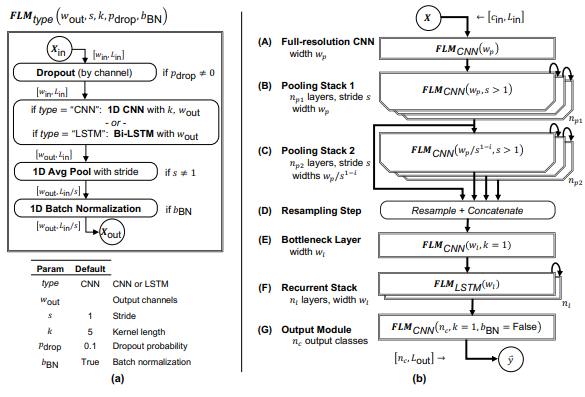

## Layers
1. (A) Full-Resolution CNN (s=1, t=cnn). High-resolution processing. Convolves CNN filters against the input signal without striding or pooling, in order to extract information at the finest available temporal resolution. This layer is computationally expensive because it is applied to the full resolution input signal (s is a stride ratio)
2. (B) Pooling Stack 1 (s>1, t=cnn). Downsamples from the input to the output frequency. 
3. (C) Pooling Stack 2 (s>1, t=cnn). Downsamples beyond the overall output frequency.
4. (D) Resampling Step. Matches output lengths.
5. (E) Bottleneck Layer. Reduces channel number
6. (F) Recurrent Stack (s=1, t=lstm). Temporal modeling
7. (G) Output Module (s=1, k=1, t=cnn). Provides predictions for each output time step

## Dataset benchmark
-  data processing steps employed by Ordóñez and Roggen [28]
- re-scale all data to have zero mean and unit standard deviation according to the statistics of the training set

## Performace Metrics
- Sample-based metrics are aggregated across all class predictions, and are not affected by the order of the predictions.
- Event-based metrics are calculated after the output is segmented into discrete events, and they are strongly affected by the order of the predictions
- F1 score for each output class
- mean F1
- weighted F1

## Ensembling
- m n-fold ensembling by (a) combining the training and validation sets  into a single contiguous set, (b) dividing that set into n disjoint folds of contiguous samples, (c) training n independent models where the ith model uses the ith fold for validation and the remaining
- n-1 folds for training, and (d) ensembling the n models together during inference by simply averaging their logit outputs before the softmax function is applied.

## Best Performance:
1. 4-fold ms-C/L n=10, stride ratio = 8, params k = 1,371
2. ms-C/L

## Result
- simple FilterNet architerture: p-CNN with the largset output:input stride ratio that can fully resolve the shortest events of interest

## References:
- sussexwearlab sussexwearlab/DeepConvLSTM Available online: https://github.com/sussexwearlab/DeepConvLSTM (accessed on Dec 9, 2019).
- Ordóñez, F.J.; Roggen, D. Deep Convolutional and LSTM Recurrent Neural Networks for Multimodal Wearable Activity Recognition. Sensors 2016, 16, 115


In [61]:
import os
print(os.getcwd())
print(os.path.join(os.getcwd()+"\..\data"))
print(os.path.exists(os.path.join(os.getcwd()+"\..\data1")))

C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\notebook
C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\notebook\..\data
False


# SKALIEREN VS NORMALISIEREN

# Create DataLoader object

In [70]:
import os
DIR = os.path.join(os.getcwd()+"\..\data")
if not os.path.exists(DIR):
    print("PROVIDE PATH TO FILE MANUALLY")
FILE_NAME = "q4_2017.xlsx" #rewrite: read file name from settings.py
PATH = os.path.join(DIR, FILE_NAME)
print(PATH)

C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\notebook\..\data\q4_2017.xlsx


In [70]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import math
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

'''
global variables for reading the dataset
'''
DIR = os.path.join(os.getcwd()+"\..\data")
if not os.path.exists(DIR):
    print("PROVIDE PATH TO FILE MANUALLY")

FILE_NAME = "q4_2017.xlsx" #rewrite: read file name from settings.py
PATH = os.path.join(DIR, FILE_NAME)

class BillingDataset(Dataset):
    '''
    create dataset from excel table based on the product number
    PS: products' names are converted into numbers from 0 to 9
    '''    
    def __init__(self, product=None, forecast=False):
        if product is None:
            self.PROD = 0 # Rewrite to cover all products
        else:
            self.PROD = product
            
        self.forecast = forecast
        '''
        get dataset (excel-table) from folder
        '''
        df = pd.read_excel(PATH, index_col=None, header=1)
        df_ = self._df_perparation(df)
        
        #CHANGE TO COVER ALL PRODUCTS
        x_, y_ = self._df_transformation(df_)
        self.x = torch.from_numpy(x_.values.astype(np.double)).double()
        self.y = torch.from_numpy(y_.values.astype(np.double)).double()
        self.n_samples = x_.values.shape[0]
        self.n_features = x_.values.shape[1]
        
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples
        
    def _df_perparation(self, df_):
        '''
        rename columns, create a column with date in iso format, create unique indexes from products' names
        '''
        df = df_.copy()
        df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
        df['Billing'].loc[df['Billing'].isna()] = 0
        df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
        products = df['Sp_number'].unique()
        prod2idx = {}
        idx2prod = {}
        for idx, prod in enumerate(products):
            if prod not in prod2idx:
                prod2idx[prod] = idx
                idx2prod[idx] = prod

        #Add column with integer product names

        products_int = []
        for idx, row in df['Sp_number'].iteritems():
            products_int.append(prod2idx[row])

        df['products'] = products_int
        
        mapper = {
            'products': 'product',
            'Fc_horizon': 'horizon',
            'Fc_and_order': 'forecast',
            'Billing': 'billing',
            "Due_date": "ddate",
            "Fc_date": "fdate"
        }
        df.rename(columns=mapper, inplace=True)
        df['isodate'] = df[['ddate']].apply(lambda x: dt.datetime.strptime(str(x['ddate'])+'-1',"%Y%W-%w"), axis=1)
        return df
    
    def _df_transformation(self, df_):
        df = df_.copy()
        if self.forecast is False:
            idxs = df.loc[df['billing'] == 0].index
        else:
            idxs = df.loc[df['billing'] != 0].index
        
        df.drop(idxs, inplace=True)
        
        
        # CHANGE TO COVER ALL PRODUCTS
        # collect billings
        df_b = df[['isodate', 'billing']].loc[df['product'] == self.PROD].drop_duplicates(['isodate'])
        df_b.set_index(['isodate'], inplace=True)
        
        # collect forecast
        df1 = df.loc[df['product'] == self.PROD].copy()
        
        hors = df1.horizon.unique()
        dates = df1.isodate.unique()
        data = {}

        for date in dates:
            for h in hors:
                val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
                if not val:
                    val = [0]
                if h not in data:
                    data[h] = []
                data[h].append(val[0])
                
        df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
        
        hors = df1.horizon.unique()
        dates = df1.isodate.unique()
        data = {}

        means = df_.T.mean()

        for date in dates:
            mean = means[date]
            for h in hors:
                val = df1.forecast.loc[(df1.horizon == h) & (df1.isodate == date)].values.tolist()
                if not val:
                    val = [mean]
                if h not in data:
                    data[h] = []
                data[h].append(val[0])
                
        df_ = pd.DataFrame(data, columns=data.keys(), index=dates)
        return df_, df_b

# Filter Net architecture Programming
- 208 time series length (T) - 208 weeks
- 12 size of a Window (W) - quarter
- 6&3 size of intermediate time series (t)
- 6 Filters (F)
- 2 Depth
- 13 features
- 1 output

In [180]:
import torch.nn as nn
# from fastai.core import ifnone, listify
# from fastai.layers import bn_drop_lin, embedding, Flatten


def conv_layer(window, ks=3, dilation=1):
    return nn.Sequential(
        nn.Conv1d(1,1, kernel_size=ks, bias=False, dilation=dilation),
        nn.AdaptiveAvgPool1d(window),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)
    )

class FilterNet(nn.Module):
#     def __init__(self, emb_size, n_cont, out_sz, layers, emb_drop=0., window=12, filters=[1,2,3,4,5,6], y_range=None, ise_bn=False, ps=None, bn_final=False):
    def __init__(self, out_sz=4, emb_drop=0., window=12, filters=[1,2,3,4,5,6], y_range=None, ise_bn=False, ps=None, bn_final=False):
        super().__init__()
        self.c1a = conv_layer(window=window // 2, ks=1, dilation=1)
        self.c1b = conv_layer(window=window // 4, ks=1, dilation=2)
        self.c2a = conv_layer(window=window // 2, ks=2, dilation=1)
        self.c2b = conv_layer(window=window // 4, ks=2, dilation=2)
        self.c3a = conv_layer(window=window // 2, ks=3, dilation=1)
        self.c3b = conv_layer(window=window // 4, ks=3, dilation=2)
        self.c4a = conv_layer(window=window // 2, ks=4, dilation=1)
        self.c4b = conv_layer(window=window // 4, ks=4, dilation=2)
        self.c5a = conv_layer(window=window // 2, ks=5, dilation=1)
        self.c5b = conv_layer(window=window // 4, ks=5, dilation=2)
        self.c6a = conv_layer(window=window // 2, ks=6, dilation=1)
        self.c6b = conv_layer(window=window // 4, ks=6, dilation=2)
        
        num_wave_outputs = (len(filters) * (window // 2)) + (len(filters) * (window // 4))
        
#         # Fastai's Mixed Input model
#         ps = ifnone(ps, [0]*len(layers))
#         ps = listify(ps, layers)
#         self.embeds = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs])
#         self.emb_drop = nn.Dropout(emb_drop)
#         self.bn_cont = nn.BatchNorm1d(n_cont)
#         n_emb = sum(e.embedding_dim for e in self.embeds)
#         self.n_emb,self.n_cont,self.y_range = n_emb,n_cont,y_range
#         sizes = self.get_sizes(layers, out_sz)
#         actns = [nn.ReLU(inplace=True)] * (len(sizes)-2) + [None]
#         layers = []
#         for i,(n_in,n_out,dp,act) in enumerate(zip(sizes[:-2],sizes[1:-1],[0.]+ps,actns)):
#             layers += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
#         if bn_final: layers.append(nn.BatchNorm1d(sizes[-1]))
#         self.layers = nn.Sequential(*layers)

        # Final layer
#         self.f = Flatten()
        self.f = nn.Flatten()
        self.lin = nn.Linear(num_wave_outputs, out_sz, bias=False)

#         self.sizes = sizes
        self.num_wave_outputs = num_wave_outputs

#     def get_sizes(self, layers, out_sz):
#         return [self.n_emb + self.n_cont] + layers + [out_sz]
    
#     def forward(self, x_window, x_cat, x_cont):
    def forward(self, x_window, x_cat, x_cont):
        # TODO: Use the filters arg to generate the conv_layers dynamically
        # Wavenet model
        self.f1a = self.c1a(x_window)
        self.f1b = self.c1b(self.f1a)
        self.f2a = self.c2a(x_window)
        self.f2b = self.c2b(self.f2a)
        self.f3a = self.c3a(x_window)
        self.f3b = self.c3b(self.f3a)
        self.f4a = self.c4a(x_window)
        self.f4b = self.c4b(self.f4a)
        self.f5a = self.c5a(x_window)
        self.f5b = self.c5b(self.f5a)
        self.f6a = self.c6a(x_window)
        self.f6b = self.c6b(self.f6a)
        self.ffc = torch.cat([self.f1a, self.f1b, self.f2a, self.f2b,
                              self.f3a, self.f3b, self.f4a, self.f4b,
                              self.f5a, self.f5b, self.f6a, self.f6b, ], 2)

#         # Fastai's Mixed Input Model
#         if self.n_emb != 0:
#             x = [e(x_cat[:,i]) for i,e in enumerate(self.embeds)]
#             x = torch.cat(x, 1)
#             x = self.emb_drop(x)
#         if self.n_cont != 0:
#             x_cont = self.bn_cont(x_cont)
#             x = torch.cat([x, x_cont], 1) if self.n_emb != 0 else x_cont
# #         x = self.layers(x)
#         if self.y_range is not None:
#             x = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(x) + self.y_range[0]

        # Combine results from both nets
        x = x.unsqueeze(1)
        self.fc = torch.cat([self.ffc, x], 2)
        self.flin = self.lin(self.f(self.fc))
        return self.flin

In [271]:
class MyFilterNet(nn.Module):
    def __init__(self, window=24, ks=3, batch_size=4):
        super(MyFilterNet, self).__init__()
        self.conv1a = nn.Conv1d(4, 1, kernel_size=1, bias=False, dilation=1)
        self.pool1a = nn.AdaptiveAvgPool1d(6)
        self.relu1a = nn.LeakyReLU(negative_slope=0.1, inplace=True)
        
        self.conv1b = nn.Conv1d(1, 1, kernel_size=1, bias=False, dilation=2)
        self.pool1b = nn.AdaptiveAvgPool1d(2)
        self.relu1b = nn.LeakyReLU(negative_slope=0.1, inplace=True)
        
        self.f = nn.Flatten()
        self.lin = nn.Linear(2, 4)
    
    def forward(self, x):
        x = self.conv1a(x)
        x = self.relu1a(x)
        x = self.pool1a(x)
        x = self.conv1b(x)
        x = self.relu1b(x)
        x = self.pool1b(x)
        x = self.f(x)
        x = self.lin(x)
        return x

In [274]:
num_epochs = 30
batch_size = 4
learning_rate = 0.01

train_set = BillingDataset()
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)

test_set = BillingDataset(forecast=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)



<ipython-input-70-7c60b5430961>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing'].loc[df['Billing'].isna()] = 0
<ipython-input-70-7c60b5430961>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
<ipython-input-70-7c60b5430961>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing'].loc[df['Billing'].isna()] = 0
<ipython-input-70-7c60b5430961>:60: SettingWithCopy

In [269]:
model.parameters

<bound method Module.parameters of MyFilterNet(
  (conv1a): Conv1d(4, 1, kernel_size=(1,), stride=(1,), bias=False)
  (pool1a): AdaptiveAvgPool1d(output_size=6)
  (relu1a): LeakyReLU(negative_slope=0.1, inplace=True)
  (conv1b): Conv1d(1, 1, kernel_size=(1,), stride=(1,), dilation=(2,), bias=False)
  (pool1b): AdaptiveAvgPool1d(output_size=2)
  (relu1b): LeakyReLU(negative_slope=0.1, inplace=True)
  (f): Flatten(start_dim=1, end_dim=-1)
  (lin): Linear(in_features=2, out_features=4, bias=True)
)>

In [275]:
# model = FilterNet()
model = MyFilterNet()
model.double()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (forecast, billing) in enumerate(train_loader):
        # forward pass
        outputs = model(forecast)
#         print(outputs.shape, outputs)
        loss = criterion(outputs, billing.view(1,4))
        print(f"loss {loss}")
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: [{loss}]")

print("Finished training")

loss 51766847874.93222
loss 9.684327893077888e+60
loss inf
loss inf
loss inf
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [1/30], Step [10/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [1/30], Step [20/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [1/30], Step [30/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [1/30], Step [40/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [1/30], Step [50/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [2/30], Step [10/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [2/30], Step [20/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss

loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [15/30], Step [10/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [15/30], Step [20/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [15/30], Step [30/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [15/30], Step [40/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [15/30], Step [50/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [16/30], Step [10/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [16/30], Step [20/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [16/3

loss nan
Epoch [27/30], Step [20/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [27/30], Step [30/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [27/30], Step [40/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [27/30], Step [50/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [28/30], Step [10/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [28/30], Step [20/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [28/30], Step [30/52], Loss: [nan]
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
loss nan
Epoch [28/30], Step [40/52], Loss: [nan]
loss nan
loss n

In [219]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [273]:
conv1 = nn.Conv1d(4, 1, kernel_size=1, dilation=1)
relu = nn.LeakyReLU(negative_slope=0.1, inplace=True)
pool1 = nn.AdaptiveAvgPool1d(6)
conv2 = nn.Conv1d(1, 1, kernel_size=1, dilation=2)
pool2 = nn.AdaptiveAvgPool1d(2)
flat = nn.Flatten()
lin = nn.Linear(2,4)
conv1.double()
conv2.double()
lin.double()
criterion = nn.MSELoss()
for i, (forecast, billing) in enumerate(train_loader):
#     forecast = forecast.view(-1, 4, 13)
#     print(i, forecast, forecast.shape)
    x = conv1(forecast)
    print(f'conv1 shape: {x.shape}, val: {x}')
    x = relu(x)
    print(f'relu shape: {x.shape}, val: {x}')
    x = pool1(x)
    print(f'pool shape: {x.shape}, val: {x}')
    x = conv2(x)
    print(f'conv2 shape: {x.shape}, val: {x}')
    x = relu(x)
    print(f'relu2 shape: {x.shape}, val: {x}')
    x = pool2(x)
    print(f'pool2 shape: {x.shape}, val: {x}')
    x = flat(x)
    print(f'flat shape: {x.shape}, val: {x}')
    x = lin(x)
    print(f'lin shape: {x.shape}, val: {x}')
    loss = criterion(x, billing.view(1,4))
    print(f'loss shape: {loss}, val: {loss.item()}')

conv1 shape: torch.Size([1, 13]), val: tensor([[206215.0114, 189018.4989, 189699.1729, 193364.8533, 189788.6079,
         187661.3384, 202973.4609, 208134.7445, 195521.5075, 260612.1153,
         224875.3472, 211227.8624, 208243.1299]], dtype=torch.float64,
       grad_fn=<SqueezeBackward1>)
relu shape: torch.Size([1, 13]), val: tensor([[206215.0114, 189018.4989, 189699.1729, 193364.8533, 189788.6079,
         187661.3384, 202973.4609, 208134.7445, 195521.5075, 260612.1153,
         224875.3472, 211227.8624, 208243.1299]], dtype=torch.float64,
       grad_fn=<AsStridedBackward0>)
pool shape: torch.Size([1, 6]), val: tensor([[194977.5611, 190950.8780, 193474.4690, 202209.9043, 227002.9900,
         214782.1132]], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
conv2 shape: torch.Size([1, 6]), val: tensor([[187869.2857, 183989.4161, 186420.9966, 194837.9365, 218727.0623,
         206951.7606]], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
relu2 shape: torch.Size([1, 6]), val: tensor

       grad_fn=<SqueezeBackward1>)
relu shape: torch.Size([1, 13]), val: tensor([[264151.2987, 254813.4955, 265050.4419, 266012.7322, 271965.0527,
         272406.5669, 278915.2843, 303021.4836, 294174.5704, 215941.9674,
         234964.0589, 227892.8937, 226046.8154]], dtype=torch.float64,
       grad_fn=<AsStridedBackward0>)
pool shape: torch.Size([1, 6]), val: tensor([[261338.4120, 267676.0756, 274428.9680, 292037.1128, 248360.1989,
         229634.5893]], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
conv2 shape: torch.Size([1, 6]), val: tensor([[251810.6093, 257917.2007, 264423.8815, 281390.0305, 239305.5839,
         221262.7131]], dtype=torch.float64, grad_fn=<SqueezeBackward1>)
relu2 shape: torch.Size([1, 6]), val: tensor([[251810.6093, 257917.2007, 264423.8815, 281390.0305, 239305.5839,
         221262.7131]], dtype=torch.float64, grad_fn=<AsStridedBackward0>)
pool2 shape: torch.Size([1, 2]), val: tensor([[258050.5638, 247319.4425]], dtype=torch.float64,
       grad_fn=<Squ

In [241]:
for i, (forecast, billing) in enumerate(train_loader):
#     forecast = forecast.view(-1, 4, 13)
    print(i, billing, billing.shape)

0 tensor([[301000.],
        [224000.],
        [280000.],
        [316000.]], dtype=torch.float64) torch.Size([4, 1])
1 tensor([[234000.],
        [234000.],
        [246000.],
        [387000.]], dtype=torch.float64) torch.Size([4, 1])
2 tensor([[223000.],
        [223000.],
        [341000.],
        [244000.]], dtype=torch.float64) torch.Size([4, 1])
3 tensor([[249000.],
        [133000.],
        [329000.],
        [212000.]], dtype=torch.float64) torch.Size([4, 1])
4 tensor([[245000.],
        [293000.],
        [302000.],
        [334000.]], dtype=torch.float64) torch.Size([4, 1])
5 tensor([[341000.],
        [165000.],
        [232000.],
        [281000.]], dtype=torch.float64) torch.Size([4, 1])
6 tensor([[332155.],
        [332155.],
        [ 93000.],
        [323000.]], dtype=torch.float64) torch.Size([4, 1])
7 tensor([[269000.],
        [282193.],
        [283000.],
        [343000.]], dtype=torch.float64) torch.Size([4, 1])
8 tensor([[230000.],
        [266000.],
        

In [276]:
with torch.no_grad():
    for forecast, labels in test_loader:
        outputs = model(forecast)
        
        print(f"outputs [{outputs}]")

TypeError: conv1d() received an invalid combination of arguments - got (DataLoader, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mDataLoader[0m, [31;1mParameter[0m, [31;1mNoneType[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mDataLoader[0m, [31;1mParameter[0m, [31;1mNoneType[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)
